<span style="color:purple; font-weight:bold">Projet de Sihem Yenbou et Güney Naz Tümüklü</span>

In [3]:
import pandas as pd
import numpy as np

In [5]:
energydata=pd.read_csv('energydata_complete.csv')

In [7]:
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
print(energydata)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [11]:
energydata.size

572315

<span style="color:blue">Analyse descriptives des données</span><br>

## Présentation de la base de données

La base de données utilisée comporte **19 735 lignes** et **29 colonnes**, soit un total de **572 315 données**.

Chaque colonne représente une variable mesurée, telles que la température, l'humidité, et d'autres paramètres météorologiques.

Nous disposons ainsi de **29 variables** :

- **Ti (i allant de 1 à 9)** : température mesurée dans différentes pièces du bâtiment.
- **To** et **T6** : températures extérieures.
- **RH_i (i allant de 1 à 9)** : humidité relative mesurée dans plusieurs pièces du bâtiment.
- **RH_out** et **RH_6** : humidité relative extérieure.
- **Autres facteurs météorologiques** : vitesse du vent, pression atmosphérique, point de rosée, etc.
- **Variables aléatoires rv1 et rv2** : ces deux variables serviront principalement à tester la robustesse du modèle de régression choisi et implémenté.



<span style="color:green">La colonne Appliances représente l'énergie utilisée en Wh (Watt par heure), c'est notre cible.</span>

<span style="color:black">Les lignes représentent la date et l'heure à laquelle la température et l'humidité de chaque pièce/endroit a été mesuré.</span>

<span style="color:black">Ces mesures ont été collectées toutes les 10 minutes pendant environ 4,5 mois.</span>

In [18]:
import matplotlib.pyplot as plt

<span style="color:blue">Séparation des observations en deux datasets le premiers pour l'analyse (l'entraînement) dans lequel on sélectionne les 15 000 premiers inputs et observations. Le deuxième dataset est dédié à la partie test dans lequel on sélectionne les 4 753 restants</span><br>

In [28]:
#Séparation des données en données d'entraînement et de validation pour la comparaison des méthodes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(energydata.iloc[:,2:])

np.shape(X)

(19735, 27)

In [30]:
nbdatatrain=15000
#les observations pour l'entrainement et les observations pour le test
Y_train = energydata.iloc[:nbdatatrain,1] 
Y_test  = energydata.iloc[nbdatatrain:,1] 
Y_test.head()

15000     90
15001    110
15002     90
15003     90
15004     80
Name: Appliances, dtype: int64

In [32]:
# the features
X_train = X[:nbdatatrain,:] 
X_test  = X[nbdatatrain:,:] 
np.shape(X_test)

(4735, 27)

In [40]:
#les applicances en tant que serie temps.
#output enfct de temperature etc. tt les autres

<span style="color:blue; font-weight:bold">Vérification de la  linéarité du modèle :</span>

<span style="color:black;">Essayons d'examiner s'il existe des dépendances linéaires entre la consommation électrique et certaines variables. Pour cela, visualisons les relations à une heure spécifique de la journée, par exemple à 17h. </span> </span>

In [21]:
sous_dataframe = energydata.iloc[::144]

print(sous_dataframe)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
144    2016-01-12 17:00:00          60       0  20.066667  42.833333   
288    2016-01-13 17:00:00          90       0  19.356667  40.790000   
432    2016-01-14 17:00:00         910       0  21.463333  41.693333   
576    2016-01-15 17:00:00          90       0  22.390000  37.863333   
...                    ...         ...     ...        ...        ...   
19152  2016-05-23 17:00:00         270       0  24.600000  45.626667   
19296  2016-05-24 17:00:00         150      20  24.390000  39.090000   
19440  2016-05-25 17:00:00          70       0  24.500000  37.826667   
19584  2016-05-26 17:00:00         360       0  24.390000  44.223333   
19728  2016-05-27 17:00:00         110       0  25.600000  47.193333   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [28]:
lesapp=sous_dataframe['Appliances']
lights=sous_dataframe['lights']
lapression=sous_dataframe['Press_mm_hg']
temperature=sous_dataframe['T1']
temext=sous_dataframe['T_out']
humidite=sous_dataframe['RH_1']
humext=sous_dataframe['RH_out']

<span style="color:black;">Exploration de la consommation en électricité en fonction du temps : </span>

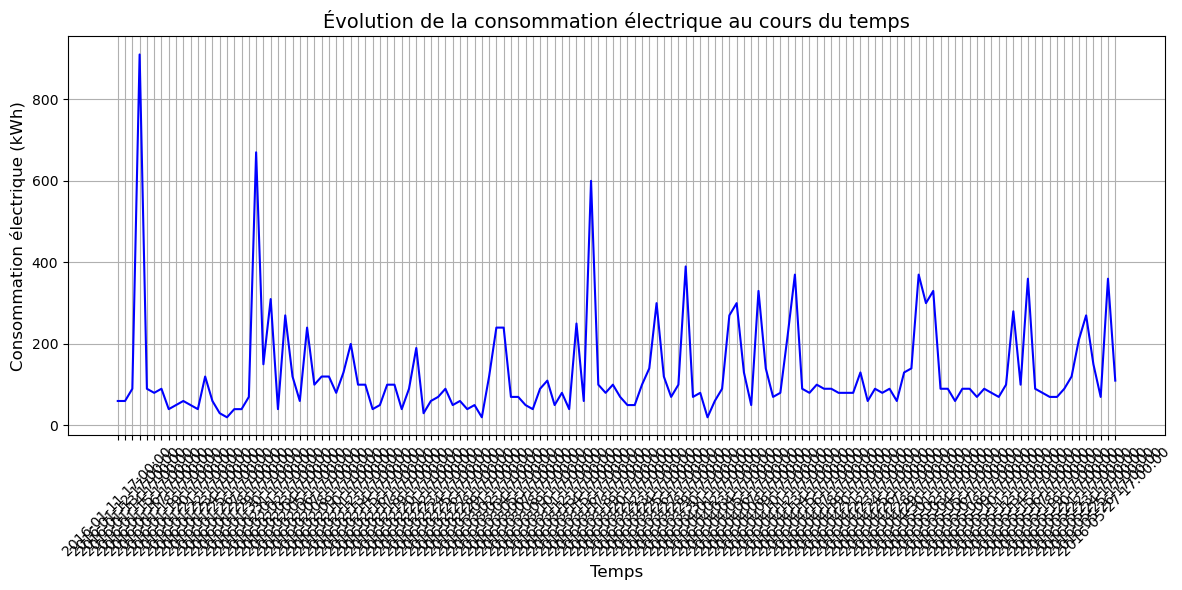

In [48]:
thedatesspe = sous_dataframe['date']
lesapp = sous_dataframe['Appliances']

plt.figure(figsize=(12, 6))
plt.plot(thedatesspe, lesapp, color='blue')
plt.xlabel("Temps", fontsize=12)
plt.ylabel("Consommation électrique (kWh)", fontsize=12)
plt.title("Évolution de la consommation électrique au cours du temps", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:black;">Exploration de la consommation d'électricité et différentes variables environnementales : </span>

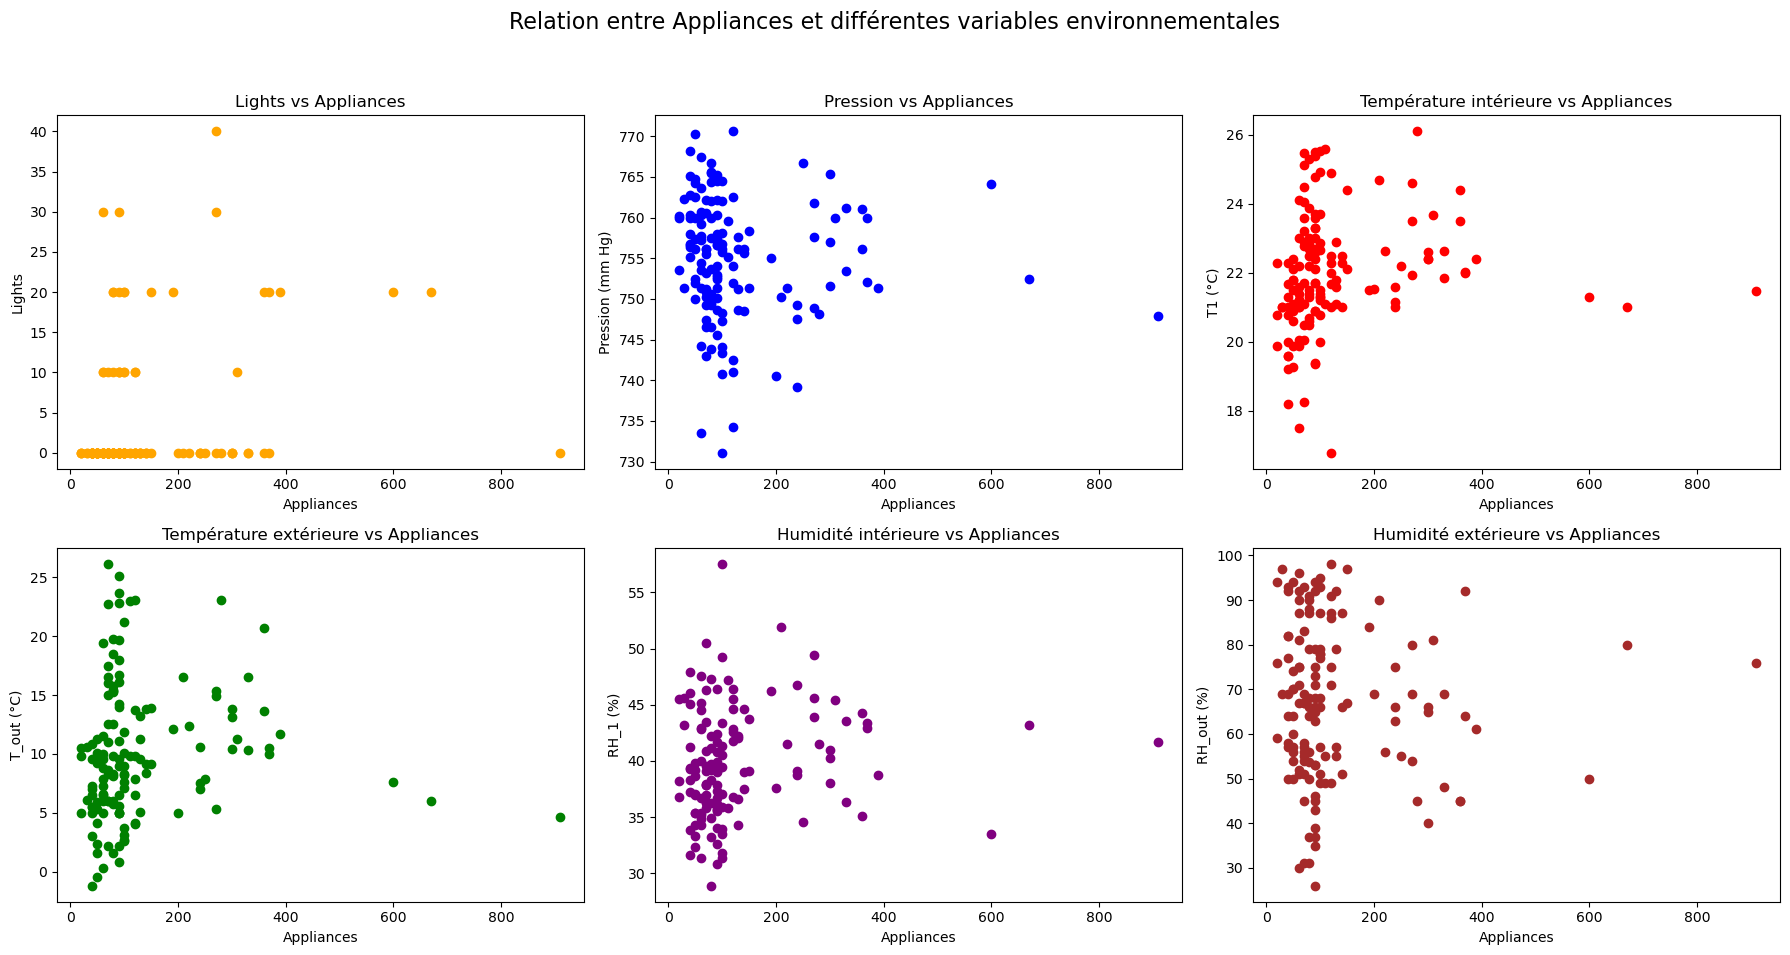

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relation entre Appliances et différentes variables environnementales', fontsize=16)

#Lights
axs[0, 0].scatter(lesapp, lights, color='orange')
axs[0, 0].set_title("Lights vs Appliances")
axs[0, 0].set_xlabel("Appliances")
axs[0, 0].set_ylabel("Lights")

#Pression
axs[0, 1].scatter(lesapp, lapression, color='blue')
axs[0, 1].set_title("Pression vs Appliances")
axs[0, 1].set_xlabel("Appliances")
axs[0, 1].set_ylabel("Pression (mm Hg)")

#Température intérieure
axs[0, 2].scatter(lesapp, temperature, color='red')
axs[0, 2].set_title("Température intérieure vs Appliances")
axs[0, 2].set_xlabel("Appliances")
axs[0, 2].set_ylabel("T1 (°C)")

#Température extérieure
axs[1, 0].scatter(lesapp, temext, color='green')
axs[1, 0].set_title("Température extérieure vs Appliances")
axs[1, 0].set_xlabel("Appliances")
axs[1, 0].set_ylabel("T_out (°C)")

#Humidité intérieure
axs[1, 1].scatter(lesapp, humidite, color='purple')
axs[1, 1].set_title("Humidité intérieure vs Appliances")
axs[1, 1].set_xlabel("Appliances")
axs[1, 1].set_ylabel("RH_1 (%)")

#Humidité extérieure
axs[1, 2].scatter(lesapp, humext, color='brown')
axs[1, 2].set_title("Humidité extérieure vs Appliances")
axs[1, 2].set_xlabel("Appliances")
axs[1, 2].set_ylabel("RH_out (%)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<span style="color:green">Conclusion : L'analyse des relations entre la consommation électrique (Appliances) et les différentes variables environnementales ne met en évidence aucune dépendance linéaire. Les nuages de points sont dispersés et ne suivent pas une tendance claire. Donc, il semble peu probable qu'un modèle de régression linéaire (tel que la régression Lasso) parvienne à capturer efficacement la structure des données. Il serait donc pertinent d’explorer des modèles non linéaires (comme les réseaux de neurones) pour modéliser la consommation électrique de manière plus fiable.</span>

## Régression linéaire sans pénalisation

Le modèle de régression linéaire classique (sans pénalisation) s’écrit sous la forme :

$
Y = X \beta + \varepsilon
$

où :

- ($ Y \in \mathbb{R}^n $) représente la consommation d’énergie (notre variable cible),
- ($ X \in \mathbb{R}^{n \times d} $) est la matrice des variables explicatives (température, humidité, tension, intensité, etc.),
- ($ \beta \in \mathbb{R}^d $) est le vecteur des coefficients à estimer,
- ($ \varepsilon $) est le terme d’erreur.

L’estimation de ($ \beta $) est obtenue en minimisant l’erreur quadratique moyenne (MSE) :

$$
\widehat{\beta} = \underset{\beta \in \mathbb{R}^d}{\arg\min} \, \frac{1}{n} \|Y - X\beta\|_2^2
$$

Cette méthode ne dépend pas d'hyperparamètre.

<span style="color:red; font-weight:bold">Présentation de la régression Lasso avec pénalisation et des hyperparamètres dont elle dépend</span>

## Régression Lasso avec pénalisation

Dans ce projet, nous cherchons à prédire la consommation d’énergie des appareils ménagers (colonne `Appliances`, exprimée en Wh) à partir de variables environnementales et électriques mesurées dans un foyer.

La régression Lasso (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire pénalisée, qui permet à la fois d’améliorer la performance du modèle en réduisant le surapprentissage et de réaliser une sélection automatique de variables en annulant certains coefficients.

Le modèle s’écrit sous la forme suivante :
$
Y = X \beta + \varepsilon,
$
où :
- ($ Y \in \mathbb{R}^n $) représente la consommation d’énergie (notre variable cible),
- ($ X \in \mathbb{R}^{n \times d} $) est la matrice des variables explicatives (température, humidité, tension, intensité, etc.),
- ($ \beta \in \mathbb{R}^d $) est le vecteur des coefficients à estimer,
- ($ \varepsilon $) est le terme d’erreur.

Ici n = 15000 et d = 27.

L’estimateur Lasso consiste à minimiser la fonction de coût suivante :
$
\widehat{\beta} = \underset{\beta \in \mathbb{R}^d}{\arg\min} \left( \frac{1}{n} \| Y - X\beta \|_2^2 + \lambda \| \beta \|_1 \right),
$
où :
- $\| Y - X\beta \|_2^2 $ est l’erreur quadratique moyenne (MSE),
- $\| \beta \|_1 $ est la norme L1 (somme des valeurs absolues des coefficients),
- $\lambda > 0 $ est un **hyperparamètre** qui contrôle l’intensité de la pénalisation.

### Choix de l’hyperparamètre $\lambda $

- Si $\lambda $ est trop petit : le modèle est peu régularisé, risque de surapprentissage.
- Si $\lambda $ est trop grand : trop de coefficients sont annulés, perte d’information.

Pour choisir une valeur optimale de $\lambda$, nous utilisons la **validation croisée**. Cela permet de tester différentes valeurs de $\lambda$ et de sélectionner celle qui minimise l’erreur de prédiction sur des données non vues (`X_test`et `Y_test`).

<span style="color:red; font-weight:bold">Discussion sur les choix d'implémentation et l'influence des différents paramètres sur les résultats</span>

<span style="font-size:14px;">
La <span style="color:blue;"><strong>pénalisation L1</strong></span>, utilisée dans la régression <span style="color:blue;"><strong>Lasso</strong></span>, permet de réduire le surapprentissage en limitant la complexité du modèle. Ce choix est particulièrement pertinent ici, compte tenu du nombre relativement élevé de variables (<span style="color:darkorange;"><strong>27</strong></span>).

La régression Lasso est également bien adaptée aux problèmes de prédiction comportant des variables redondantes ou peu informatives, en réalisant automatiquement une sélection des variables les plus pertinentes.

Par ailleurs, les données ont été <span style="color:green;"><strong>normalisées</strong></span> afin que toutes les variables soient sur la même échelle. Cette étape est essentielle, car la pénalisation L1 est sensible à l'échelle des variables : <span style="color:red;"><em>sans normalisation</em></span>, certaines variables pourraient être favorisées de manière artificielle lors de la sélection.
</span>


<span style="color:blue; font-weight:bold">Implémentation d'une régression LASSO avec pénalisation en utilisant le module scikit_learn :</span><br>

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

In [65]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

<span style="color:blue">Création d'un array avec plusieurs valeurs de lambda (le paramètre de pénalisation) :</span><br>

In [68]:
n_alphas = 100
alphas = np.logspace(-2, 1, n_alphas)

In [70]:
import warnings
from sklearn.exceptions import ConvergenceWarning

#Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [76]:
#Pour chaque valeur de lambda on applique la régression de LASSO
lasso = Lasso(max_iter=100)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

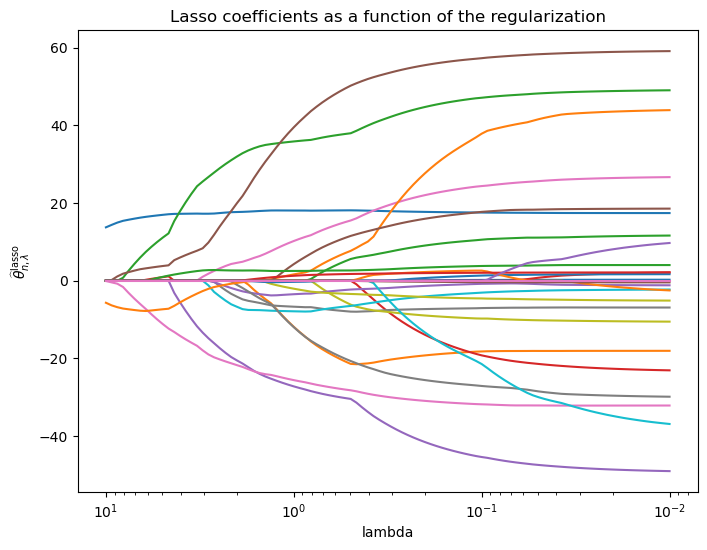

In [78]:
#Visualisation de l'estimateur theta_chapeau_lambda par rapport aux différentes valeurs de lambda
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

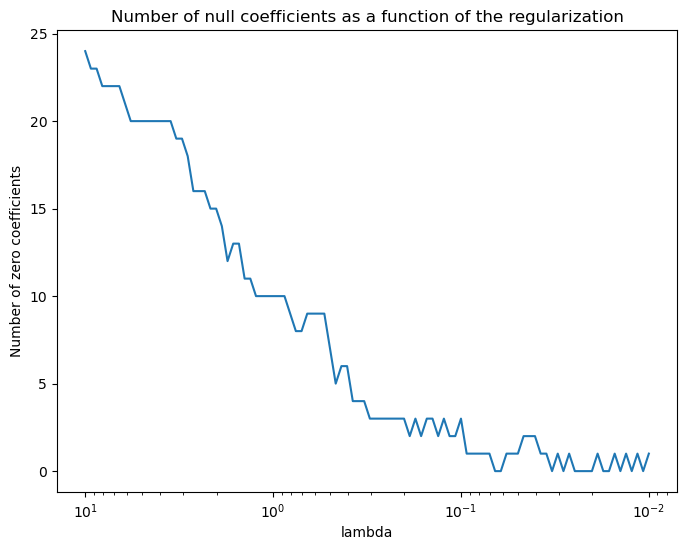

In [80]:
#Visualitation de nombre des coefficients de theta_chapeau_lambda qui sont réduite à zéro avec la pénalisation lambda
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Number of zero coefficients')
plt.title("Number of null coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

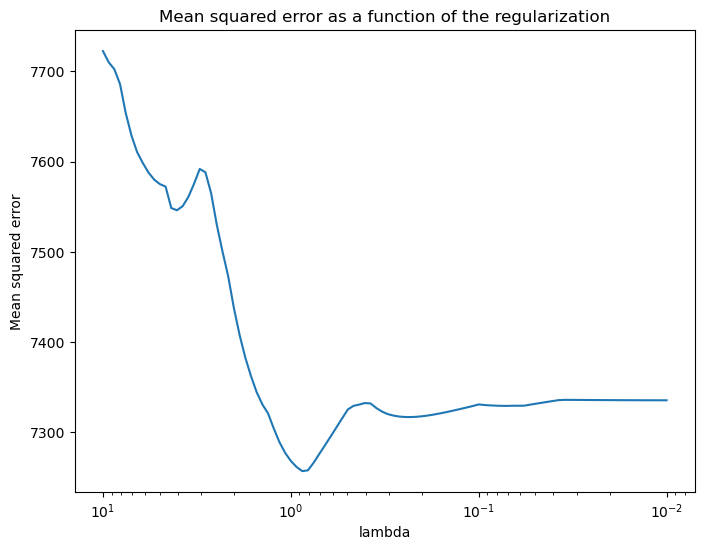

In [82]:
#Visualisation de l’erreur quadratique moyenne (MSE, Mean Squared Error) entre les prédictions et les vraies observations, 
#en fonction de différentes valeurs de λ (lambda)
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, rmse) 
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

<span style="color:blue">Validation croisée K-Fold pour choisir le meilleur lambda :</span><br>

In [84]:
#K-fold cross-validation
from sklearn.model_selection import KFold
lasso = Lasso(max_iter=100)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_cv = [] #L'erreur en moyenne quadratique pour chaque lambda
for a in alphas:
    mse_fold = []

    for train_index, val_index in kf.split(X_train):
        X_t, X_val = X_train[train_index], X_train[val_index]
        Y_t, Y_val = Y_train[train_index], Y_train[val_index]
        lasso.set_params(alpha=a)
        lasso.fit(X_t, Y_t)
        Y_pred = lasso.predict(X_val)
        mse = mean_squared_error(Y_val, Y_pred)
        mse_fold.append(mse)
    mse_cv.append(np.mean(mse_fold))




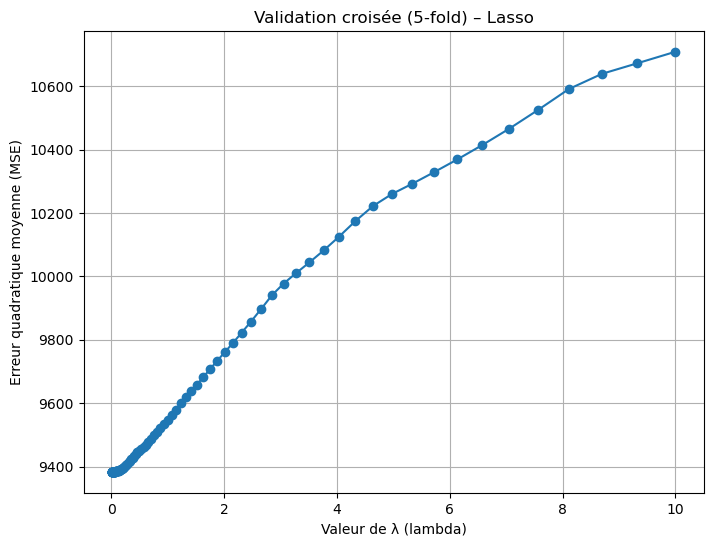

In [86]:
#Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_cv, marker='o')

plt.xlabel("Valeur de λ (lambda)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title(f"Validation croisée ({k}-fold) – Lasso")
plt.grid(True)
plt.show()


In [88]:
#Choix du meilleur lambda
best_alpha = alphas[np.argmin(mse_cv)]
print("Meilleur lambda :", best_alpha)


Meilleur lambda : 0.046415888336127795


In [90]:
#Ré-trainer le modele avec le lambda obtenu grace a la validation croisée
final_model = Lasso(alpha=best_alpha, max_iter=100)
final_model.fit(X_train, Y_train)
y_test_pred = final_model.predict(X_test)


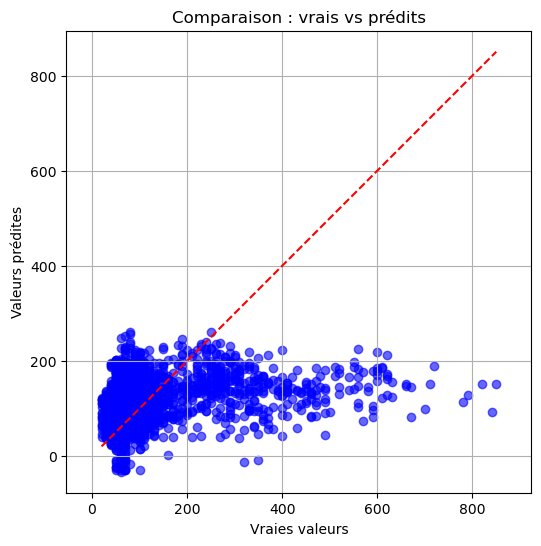

In [92]:
#Visualisation de la qualité des prédictions
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison : vrais vs prédits")
plt.grid(True)
plt.axis('equal')
plt.show()

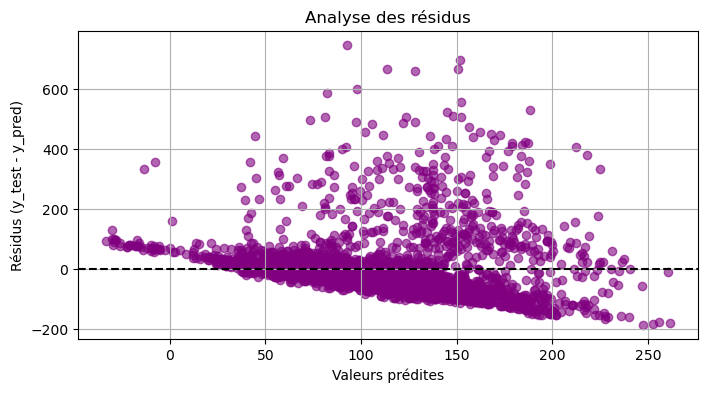

In [94]:
#Visualisation des résidues

residuals = Y_test - y_test_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y_test - y_pred)")
plt.title("Analyse des résidus")
plt.grid(True)
plt.show()

<span style="color:green">Possible piste d'amélioration: temps d'éxécution trop long en python </span>


<span style="color:blue">La validation croisée K-Fold automatique avec sckit-learn :</span>


In [96]:
#lotting cross validation predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lasso, X_train, Y_train, cv=100)

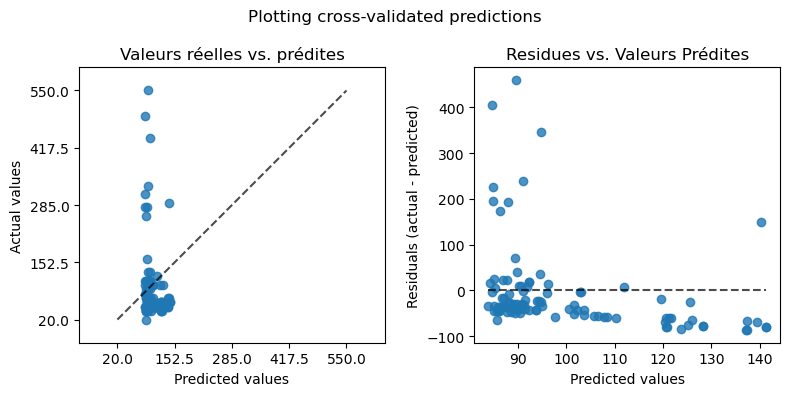

In [98]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Valeurs réelles vs. prédites")
PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residues vs. Valeurs Prédites")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

<span style="color:blue">Les prédictions obtenues sont éloignées des valeurs réelles, ce qui indique une erreur de prédiction relativement élevée.</span><br>

<span style="color:green">Conclusion : La régression Lasso n'est pas concluante. Ce qui n'est pas surprenant, en effet nous avons démontré plus haut l'absence de relations linéaires entre la variable cible (Appliances) et les variables explicative.</span>

<span style="color:red; font-weight:bold">Implémentation avec réseaux de neurones denses</span>

In [26]:
import tensorflow

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 

In [150]:
#Choix liés à l'architecture des neurones
input_d = 27 
hidden_d = 16

<span style="color:green">Justification : On veut réduire progressivement la dimension pour extraire de potentielles caractéristiques hiérarchiques.
Pour les couches cachées/hidden de neurones, nous utiliserons donc la fonction d'activation ReLu.</span>

In [148]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(27,)),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                448       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50)

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 18784.9648 - val_loss: 23052.4160
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 14810.7266 - val_loss: 22332.3750
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 13121.7217 - val_loss: 20954.8301
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 12095.5977 - val_loss: 19130.9336
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 11326.5264 - val_loss: 17108.5488
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 10788.0156 - val_loss: 15502.6533
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 10439.6533 - val_loss: 14370.2842
Epoch 8/50
375/375 [==============================] - 2s 6ms/step - loss: 10187.3730 - val_loss: 13521.6162
Epoch 9/50
375/375 [==============================] - 2s 5ms/step - loss: 9997.9658 - val_loss: 12908.1191
Epoch 10/50
375/375 [========

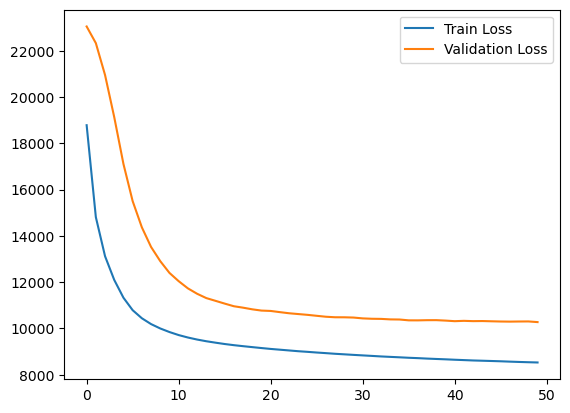

In [154]:
#Visualisation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

<span style="color:green">Conclusion : Les courbes de perte d'entraînement et de validation convergent bien. Il n'y a pas de divergence significative entre les deux courbes, donc le modèle généralise correctement et il n'y a pas de surapprentissage. Ce sont des résultats cohérents, car les réseaux de neurones sont particulièrement adaptés à la modélisation de relations complexes et non linéaires dans les données.</span><br>

<span style="color:green"></span>

## Comment améliorer les résultats ?

L'objectif est de réduire l'erreur de prédiction, c'est-à-dire l'écart entre les valeurs prédites et les valeurs observées sur l'ensemble de test.

### 1. Agir sur le modèle
- **Choix de λ (régularisation)** : utiliser une validation croisée avec un plus grand nombre de plis (par exemple un K-fold avec \( K > 5 \)).
- **Tuning des hyperparamètres** : augmenter `max_iter` pour permettre au modèle de mieux converger (attention aux limites de puissance de calcul).
- **Analyse des erreurs** : identifier les zones où le modèle se trompe le plus, et éventuellement créer un modèle spécialisé pour ces cas particuliers.

### 2. Travailler sur les variables (features)
- **Analyser les dépendances** : certaines relations complexes entre les variables peuvent être cachées et ne pas être capturées par un modèle linéaire.
- **Sélection de variables** : supprimer les variables inutiles ou redondantes en utilisant des outils comme `sklearn.feature_selection`.

### 3. Optimisation spécifique aux réseaux de neurones
- **Architecture** : Le modèle est potentiellement trop simple, en effet le nombre de couches cachées est de **16**. 
- **Régularisation** : Il aurait été utile d'ajouter une **pénalisation L2** dans les couches Dense.